### 목표
 - 타이타닉 데이터를 활용하여 생존자/사망자 예측해보자
 - kaggle 경진대회에 참가하여 우리 점수를 확인해보자
 - 머신러닝의 전체 과정을 체험해보자
### 머신러닝 과정
- 1. 문제정의: 목표설정, 어떤 모델
- 2. 데이터 수집: 분류를 할거라면 class로 담긴 레이블이 있는 데이터 수집 같은
- 3. 데이터 전처리: 이상치/결측치 처리, 특성 처리(특성공학)
- 4. 데이터 탐색(탐색적 데이터 분석): 기술 통계, 특성 간의 관계
- 5. 모델 선택 및 하이퍼 파라미터 설정
- 6. 모델 예측 및 평가
- 7. 모델 서비스화

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화 라이브러리
# train, test 분리하는 도구
from sklearn.model_selection import train_test_split
# 평가 도구
from sklearn.metrics import accuracy_score
# tree model - 사망/생존 이진부류
from sklearn.tree import DecisionTreeClassifier

In [84]:
# train, test 변수에 데이터 불러와서 담기
# (단, 인덱스를 승객의 번호로 설정해서 담아줄 것)
train = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')
train.head(3)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


 0   Survived  - 생존 / 사망 여부 (답 데이터, Class Label)
 1   Pclass    - 승객의 등급(1- 귀족층, 2- 중간층, 3-하위계층)
 2   Name      - 이름
 3   Sex       - 성별(male, female)
 4   Age       - 나이 (0~
 5   SibSp     - 형제자매 + 배우자 수
 6   Parch     - 부모 + 자식 수
 7   Ticket    - 티켓 번호
 8   Fare      - 요금
 9   Cabin     - 객실 번호
 10  Embarked  - 승선항

In [85]:
test = pd.read_csv('./data/titanic/test.csv', index_col='PassengerId')
test.head(3)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [86]:
# 크깋 확인
print('트레인 크기', train.shape)
print('테스트 크기', test.shape)

트레인 크기 (891, 11)
테스트 크기 (418, 10)


In [87]:
# 컬럼명만 뽑아서 확인하기
print(train.columns)
print(test.columns)

# 컬럼의 순서도 중요함
# 컬럼의 명도 동일해야함

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


### 데이터 전처리 및 데이터 탐색
#### 결측치 확인

In [88]:
# info 함수 통해서 train 결측치 확인
train.info()
# 결측치 존재 컬럼: Embarked, Age, Cabin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [89]:
# info 함수 통해서 test 결측치 확인
# 데이터 자리에 결측치가 있니? => 데이터.isnull()
test.isnull().sum()
# 결측치 존재 컬럼: Fare, Age, Cabin
# 결측치를 삭제하기 보다 채우면서 처리해보겠음

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### train-Embarked 결측치 처리
 - 승객이 탑승한 항구 이름

In [90]:
# train 데이터 기준으로 embarked 컬럼 확인
# nan 결측치
train['Embarked'].unique()

# 빈도수가 높은 승선항 알파벳으로 결측치를 처리해보자
train['Embarked'].value_counts() # 대문자 S 644 로 채워보자!

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
# test 안보나요?
# 탐색용 데이터는 train , 
# 모델 학습 : 모델이 학습을 잘하도록 데이터를 셋팅
# test 데이터는 모델을 일반화시키는데 도움이 되지 않음
# train 데이터가 학습할때 사용되고 모델의 일반화에 도움을 줌

In [92]:
# Embarked 결측치를 'S' 로 채우기
# fillna('채울값')
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].unique()
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
# 추가) Embarked 컬럼에 결측치가 있던 행의 정보를 확인하고
# 비슷한 사람의 데이터가 있다면 그 사람의 승선항 정보를 대체값으로 활용

#### test - Fare 결측치 처리
 - 요금 평균, 중앙값 계산 가능
 - 데이터 분석을 진행하면서 관련이 있을 법한 컬럼을 연관지어서 대체값을 확인해보자

In [94]:
# train 기준으로 데이터 탐색
# Fare 컬럼 정보 확인 -> 기술통계량
train['Fare'].describe()
# 요금의 대표값으로 평균보다 중앙이 더 나을 수 있겠음

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [95]:
# 변수(특성) 간의 상관관계 확인
# 상관계수(숫자) : -1 ~ 1
# 각 컬럼의 상관 정도를 수치로 표현한 값 : 상관계수
# -1, 1에 가까울수록 변수간의 관계성이 있음
# 0에 가까울수록 변수간의 관계성이 적음
# 생존 사망과 연관이 있는 컬럼 확인해보기
train.corr()['Survived'].abs()
# Pclass 가 생존/사망 연관성이 있을 수 있겠음
# 등급에 따라 요금의 중앙값으로 채워주는 것도 의미가 있지 않을까?

C:\Users\gjaischool1\AppData\Local\Temp\ipykernel_716\622005899.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Survived'].abs()


Survived    1.000000
Pclass      0.338481
Age         0.077221
SibSp       0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

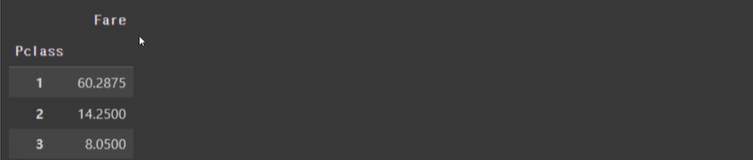

In [96]:
# 1. Pclass, Fare 두개 컬럼만 인덱싱해보기
# 2. Pclass 1,2,3 등급까지 묶기(그룹화하기)
# 3. median() 집계함수(count(), ) 연결
# * 집계함수(count(), mean(), min(), max(), median())
train[['Pclass','Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [97]:
# test - Fare컬럼에 결측치가 있는 행 정보 출력하기
test[test['Fare'].isnull()]

# fillna() 를 활용해서 Fare 결측치 채워보기
# 3등급 -> 8.0500
# 1. test Fare 컬럼 접근
# 2. fillna() 사용해서 8.0500으로 채워보기
# 2번까지 했을 때 결측치가 없으면 test Fare 컬럼에 다시 초기화
test['Fare'].fillna(8.0500)
test[test['Fare'].isnull()] # 결측치 처리 완료

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### Age 컬럼 결측치 채우기
 - 단순 기술 통계로만 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보는 방향으로 진행해보자
 - Pclass, Sex 과 연관지어서 나이 통계 확인해보자

In [98]:
#  train Age 컬럼 접근해서 기술 통계량 확인하기
train['Age'].describe()

# 평균, 중앙값의 큰 차이가 없음
# 평균치로 데이터를 처리해보자

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [99]:
# 1 - 여성 - 나이 평균
# 1 - 남성 - 나이 평균
# 2 - 여성 - 나이 평균
# 2 - 남성 - 나이 평균
# 3 - 여성 - 나이 평균
# 3 - 남성 - 나이 평균
# 3개 - Pclass, Age, Sex
gb1 = train[['Pclass','Age','Sex']].groupby(['Pclass','Sex']).mean()

In [100]:
# gb1
# 인덱스가 2개 => 멀티인덱스(중복인덱스)
# 3, female 평균나이 데이터 접근해보기
gb1.loc[(3, 'female')]

# 1, male 평균 나이 접근해보기
gb1.loc[(1, 'male')]
# gb1.loc[(승객의 등급, 성별

Age    41.281386
Name: (1, male), dtype: float64

In [101]:
# 추가적으로 이해하는 코드
# numpy 널값 확인하는 함수
# Nan
a = np.array([1, 2, np.nan])
np.isnan(a[2])

True

In [108]:
# train, test 결측치
# train Age 컬럼의 결측치가 있는 행 정보 출력해보기
# 1. Age 접근
# 2. null 확인
# 3. 불리언 인덱싱 적용 -> 행정보 출력됨
train[train['Age'].isnull()]

# 복잡한 처리를 해줄 수 있는 도구가 있나?
# 사용자 정의 함수 생성 : Pclass, Sex 을 확인해서 gb1에 있는 평균 나이로 대체
# 판다스 데이터랑 어떻게 연결? apply()
def fill_age(data):
    # 만약 나이가 결측치라면 gb1에서 대체할 값을 가져오고 반환
    if np.isnan(data['Age']):
        gb1_age = gb1.loc[(data['Pclass'],data['Sex'])]
        return gb1_age
    # 결측치가 x 원래 나이 값을 반환
    else:
        return data['Age']

train['Age'] = train.apply(fill_age, axis=1).astype('int64')# axis = 1 한사람의 대한 정보가 처리단위로 연결
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [110]:
# test Age 컬럼 결측치 처리하기
# gb1 - train
# test 결측치를 채울때 train(모델의 일반화 도움을 주는) 데이터를 기준으로 채워줌
test['Age'] = test.apply(fill_age, axis=1).astype('int64')# axis = 1 한사람의 대한 정보가 처리단위로 연결
test['Age'].isnull().sum() # 결측치 처리 완료 확인!

0

#### Cabin 컬럼 결측치 채우기

In [115]:
# train Cabin 컬럼 접근해보기
train['Cabin'].unique ()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [122]:
# 'M' 임의로 Cabin 결측치를 채워보기
# train, test
# fillna()
train['Cabin'].fillna('M', inplace=True)
test['Cabin'].fillna('M', inplace=True)

# 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

In [128]:
# train Cabin 접근해서 살펴보기
train['Cabin'][2][0]
# 판다스.str 해당 컬럼에 문자열 자료에 접근하는 키워드
train['Deck'] = train['Cabin'].str[0] # Deck 이라는 새로운 컬럼명 생성하여 저장
# test 도 실행해보기
test['Deck'] = test['Cabin'].str[0]

In [141]:
# Cabin 컬럼 삭제하기
# train, test
# train = train.drop('Cabin', axis=1)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
# info() 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 no

#### 데이터 탐색
- train 데이터를 이용해서 탐색 진행함
- test 를 탐색하는 것은 모델의 일반화에 도움 안됨
- Deck 컬럼이 생존/사망과 얼마나 연관이 있는지 확인해보기

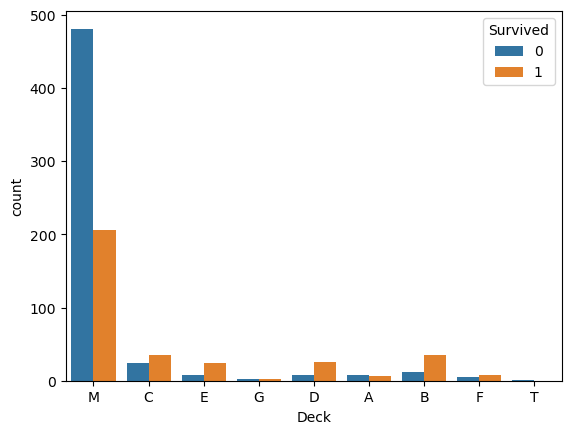

In [142]:
# x - Deck, y - survived
sns.countplot(data = train, x = 'Deck', hue = 'Survived')
plt.show()

- M에서 상대적으로 사람이 많이 사망했음 
- Pclass와 Survived 컬럼의 관계확인(생존/사망 연관)

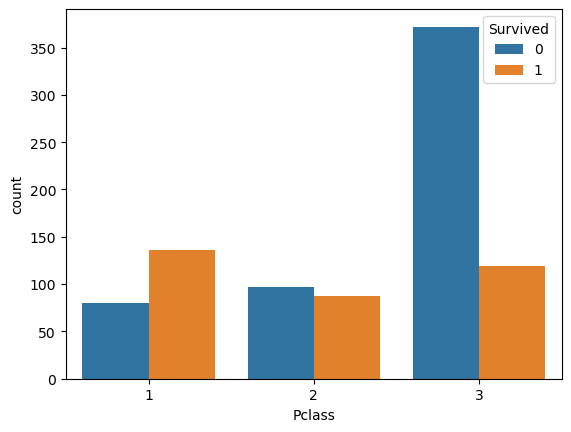

In [143]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

- 승객의 등급이 높을 수록 비교적 생존율 높음
- 3등급의 승객들은 많이 사망함
- Deck과 Pclass 시각화

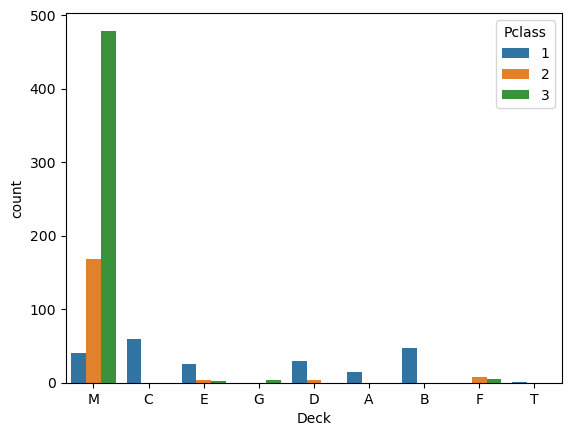

In [144]:
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.show()

- M(결측치) 안에는 3등급의 사람들이 많아서 사망율이 높게 출력
- Sex과 Survived 관계 확인해보기 

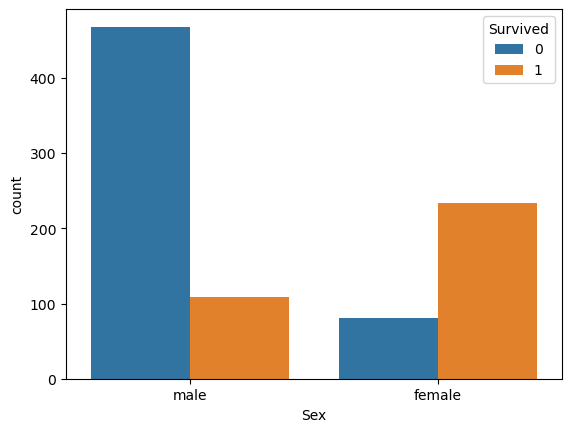

In [145]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

- male 사망율이 높음, female 비교적 생존율이 높음
- Embarked과 Survived 관계 확인해보기

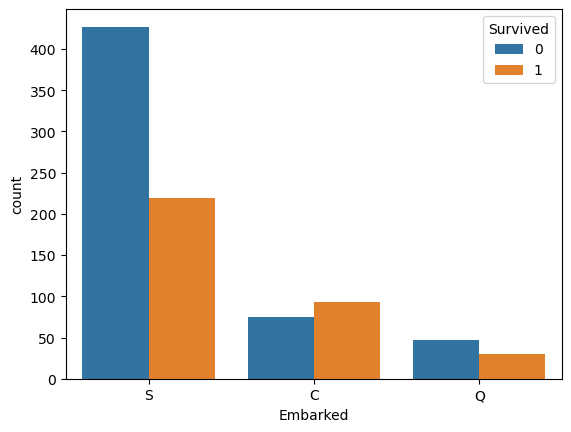

In [147]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

- Embarked와 Pclass 관계 확인

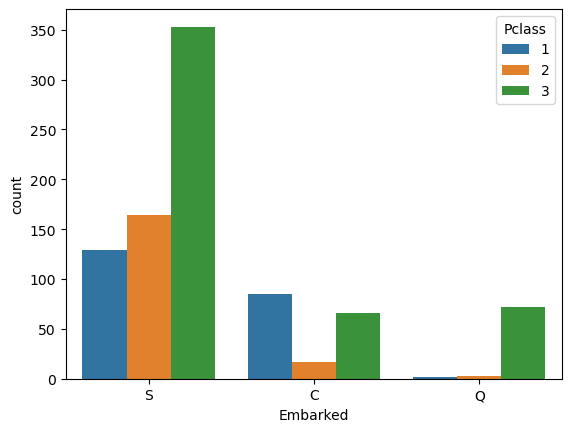

In [148]:
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')
plt.show()